**Shawn (HyungJoon) Yoon**

**8 hrs** 

**Yes. I followed the honor code on this problem set.** 

**1.A: Derive a formula for the profit-maximizing price $P_i^*$ as a function of ($\beta_1$, $\beta_0$, $c_i$, $U_i$).**

max $\Pi_i$($P_i$) = $Q_i$($P_i$) * ($P_i$ - $c_i$)

FOC $\Pi_i$($P_i$) = 0 

$\beta_0$ + 2$\beta_1$$P_i$ - $\beta_1$$c_i$ + $U_i$ = 0

**$P_i^*$ = ($\beta_1$$c_i$ - $\beta_0$ - $U_i$) / 2$\beta_1$**

**1.B: Derive a formula for the profit-maximizing quantity $Q_i^*$ as a function of ($\beta_1$, $\beta_0$, $c_i$, $U_i$).**

Demand Function: $Q_i$ = $\beta_0$ + $\beta_1$$P_i$ + $U_i$

Rewrite the demand function for $P_i$ as a function of $Q_i$.

$P_i$ = ($Q_i$ - $\beta_0$ - $U_i$) / $\beta_1$

We can write the profit function in terms of quantities now. 

max $\Pi_i$($Q_i$) = $Q_i$ * ((($Q_i$ - $\beta_0$ - $U_i$) / $\beta_1$) - $c_i$)

FOC $\Pi_i$($Q_i$) = 0 

**$Q_i^*$ = ($\beta_0$ + $U_i$ + $c_i$$\beta_1$) / 2**


In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from linearmodels import OLS, IV2SLS 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Import data
df_data = pd.read_csv("cement_data.csv")
df_data.describe()

,quantity,price,marginal_cost
count,107.000000,107.000000,107.000000
mean,58.044658,93.661326,40.893455
std,9.844403,8.152619,12.205947
min,34.918711,71.100828,20.016081
25%,51.491145,87.461543,30.252817
50%,58.625370,94.285421,42.388679
75%,64.938534,99.566770,52.067163
max,84.918270,115.686635,59.544646


**1C: Scatterplot of Price vs. Quantity**

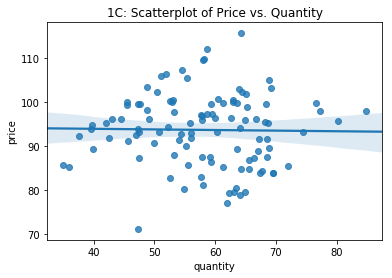

(Text(0.5, 1.0, '1C: Scatterplot of Price vs. Quantity'), None)

In [3]:
# 1C: Scatterplot of Price vs. Quantity
sns.regplot(x='quantity', y='price', data=df_data).set_title(
    '1C: Scatterplot of Price vs. Quantity'), plt.show()

**1D: Is the slope of the relationship between price and quantity an unbiased estimate of the $\beta_1$ parameter in the demand function above? Why or why not?**

No, it's not a good estimate of the $\beta_1$. We are trying to regress quantities on price. But within the noise variable, we assume that there is demand shock which is supposedly related to price. So we have endogenous issue here. 

In order for the slope to be a good estimate of $\beta_1$, price needs to be uncorrelated with the noise and correlated with quantities, which is not the case in here. 

Therefore, we need an instrument to fix this problem. We are going to use marginal_cost as an instrument. It is a good instrument because it is correlated with price but not with the demand shock. 

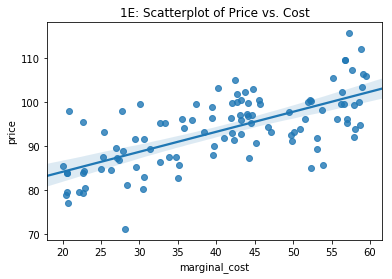

(Text(0.5, 1.0, '1E: Scatterplot of Price vs. Cost'), None)

In [4]:
# 1E: Scatterplot of Price vs. Cost
# adjust the code for 1C
sns.regplot(x='marginal_cost', y='price', data=df_data).set_title(
    '1E: Scatterplot of Price vs. Cost'), plt.show()

**$P_i^*$ = ($\beta_1$$c_i$ - $\beta_0$ - $U_i$) / 2$\beta_1$**

As you can see from this equation, when the cost increases, the price increases. So there is a correlation between the two. 

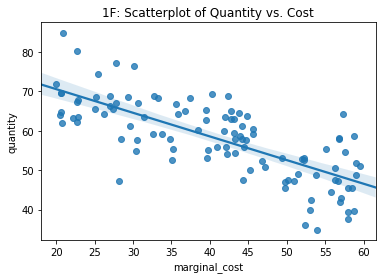

(Text(0.5, 1.0, '1F: Scatterplot of Quantity vs. Cost'), None)

In [5]:
# 1F: Scatterplot of Quantity vs. Cost
# adjust the code for 1C
sns.regplot(x='marginal_cost', y='quantity', data=df_data).set_title(
    '1F: Scatterplot of Quantity vs. Cost'), plt.show()

This plot is showing the negative relationship between the cost and the quantity. When the cost increases, price increases. When the price increases, the quantities sold decreases. 

So, the cost is indirectly affecting the quantity. 

marginal_cost -> price -> quantity

In [6]:
df_data.head()

,quantity,price,marginal_cost
0,68.868817,104.996694,42.388679
1,64.135595,78.807326,20.502239
2,63.455278,80.565587,22.878971
3,39.672656,94.757104,58.691053
4,62.992347,99.989789,42.724018


In [7]:
# 1G: Regress price on marginal cost
# use the code of cs1_pandora
model1 = OLS.from_formula('price ~ 1 + marginal_cost', df_data)
print(model1.fit().summary)

                            OLS Estimation Summary                            
Dep. Variable:                  price   R-squared:                      0.4626
Estimator:                        OLS   Adj. R-squared:                 0.4574
No. Observations:                 107   F-statistic:                    80.180
Date:                Wed, Oct 30 2019   P-value (F-stat)                0.0000
Time:                        21:10:26   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         75.085     2.1215     35.392     0.0000      70.927      79.243
marginal_cost     0.4543     0.0507     

In [8]:
# 1H: Regress quantity on marginal cost
model2 = OLS.from_formula('quantity ~ 1 + marginal_cost', df_data)
print(model2.fit().summary)

                            OLS Estimation Summary                            
Dep. Variable:               quantity   R-squared:                      0.5540
Estimator:                        OLS   Adj. R-squared:                 0.5498
No. Observations:                 107   F-statistic:                    115.72
Date:                Wed, Oct 30 2019   P-value (F-stat)                0.0000
Time:                        21:10:26   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         82.593     2.3337     35.392     0.0000      78.019      87.167
marginal_cost    -0.6003     0.0558    -

In [9]:
# 1I Divide your answer in 1H by your answer in 1G and report the result. As we discussed in lecture, this is an estimate of $\beta_1$.

-0.6003/0.4543

-1.3213735417125247

In [10]:
#1J

iv_model = IV2SLS.from_formula('quantity ~ 1 + [price ~ marginal_cost]', df_data) # complete the formula
res = iv_model.fit()
print(res.summary)
beta1 = res.params[1]
beta1

                          IV-2SLS Estimation Summary                          
Dep. Variable:               quantity   R-squared:                     -1.1613
Estimator:                    IV-2SLS   Adj. R-squared:                -1.1819
No. Observations:                 107   F-statistic:                    23.880
Date:                Wed, Oct 30 2019   P-value (F-stat)                0.0000
Time:                        21:10:27   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      181.82     25.289     7.1897     0.0000      132.25      231.38
price         -1.3215     0.2704    -4.8867     0.00

c:\users\shawnyoon\appdata\local\programs\python\python37\lib\site-packages\linearmodels\utility.py:184: RuntimeWarning: divide by zero encountered in true_divide
  return vecs @ np.diag(1 / np.sqrt(vals)) @ vecs.T


-1.3214926355178704

In [11]:
# 1K: Demand elasticities

etas =  -1.3215 * df_data['price'] / df_data['quantity']#complete the formula
etas.describe()

count    107.000000
mean      -2.199564
std        0.445619
min       -3.240195
25%       -2.515977
50%       -2.128343
75%       -1.842472
max       -1.526003
dtype: float64

**1L:** 

**Are these cement plants pricing on the elastic (n < -1) or inelastic (n > -1) portion of their demand functions?**

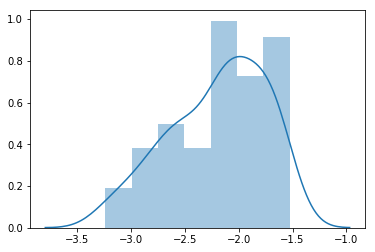

In [12]:
sns.distplot(etas) 

These plants are pricing on the elastic portion of their demand functions. 

**Is this what you would expect given our discussion of the inverse elasticity markup rule? (Hint: If you put n > -1 into the inverse elasticity markup rule, you get an equation that doesn't make any sense. So the monopolist will always set price at a point on the demand curve where n < -1.)**

Yes.

**1M: Imagine now that states regulate all cement plants and force them to sell all cement at marginal cost $c_i$. In each market, there would now be a new equilibrium quantity $Q_i^p$. Create the vector of 107 values of $Q_i^p$. Report the mean.**

In [13]:
# 1M: Quantity at marginal cost
    # First need to recover (beta_0 + u_i) for every market. 
    # To do this, back this out given the existing price and quantity.
beta0_plus_noise = df_data.quantity - beta1 * df_data.price

    # Now that we have that, we can plug in marginal cost to the demand function
Q_pc = beta0_plus_noise + beta1 * df_data.marginal_cost# complete the formula

Q_pc.mean()

127.77701006678153

In [14]:
new_data = pd.DataFrame(data=dict(quantity = Q_pc, price = df_data.marginal_cost))

In [15]:
new_data.head()

,quantity,price
0,151.604848,42.388679
1,141.185338,20.502239
2,139.687716,22.878971
3,87.333677,58.691053
4,138.668640,42.724018


In [16]:
df_data.head()

,quantity,price,marginal_cost
0,68.868817,104.996694,42.388679
1,64.135595,78.807326,20.502239
2,63.455278,80.565587,22.878971
3,39.672656,94.757104,58.691053
4,62.992347,99.989789,42.724018


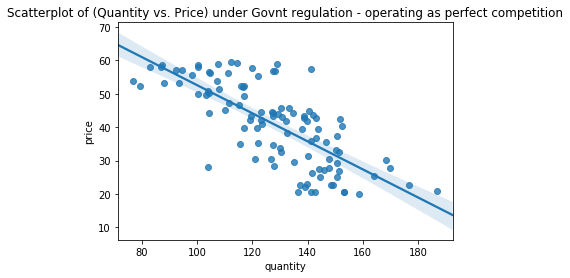

(Text(0.5, 1.0, 'Scatterplot of (Quantity vs. Price) under Govnt regulation - operating as perfect competition'),
 None)

In [17]:
sns.regplot(x='quantity', y='price', data=new_data).set_title(
    'Scatterplot of (Quantity vs. Price) under Govnt regulation - operating as perfect competition'), plt.show()

**1N:** 

**Write the formula for the deadweight loss (DWL) from monopoly pricing relative to marginal cost pricing in market i, as a function of ($Q_i^p$, $Q_i^*$, $P_i^*$, $c_i$).** 

DWL = ($P_i$ - $c_i$) * ($Q_i^p$ - $Q_i^*$) / 2 

In [18]:
#1O: DWL
DWL = (df_data['price'] - df_data['marginal_cost'])*(Q_pc - df_data['quantity'])/2 # complete the formula
DWL.sum()

202469.71236039212

In [19]:
df_data

,quantity,price,marginal_cost
0,68.868817,104.996694,42.388679
1,64.135595,78.807326,20.502239
2,63.455278,80.565587,22.878971
3,39.672656,94.757104,58.691053
4,62.992347,99.989789,42.724018
5,47.266009,71.100828,28.131729
6,76.534922,99.670231,30.093030
7,46.926779,92.413743,49.753034
8,67.093345,88.811129,27.817179
9,54.339826,92.654199,43.254357
